#  Skin Cancer CNN  Classification

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')


# Resim okumak için
import cv2
# bilgisayardaki dosyalrarı okumak için
import os # operating system

In [2]:
!unzip /content/Skin_Data.zip

unzip:  cannot find or open /content/Skin_Data.zip, /content/Skin_Data.zip.zip or /content/Skin_Data.zip.ZIP.


In [3]:
labels=["Cancer","Non_Cancer"]  # klasör isimlerimiz
img_path='Skin_Data/'  # üst klasör

#  yani Skin_Data/ Cancer or Non-Cancer/ inçindekiler

In [ ]:
df=pd.DataFrame({"img":img_list,"labels":label_list})
df.img

,img
0,Skin_Data/Cancer/402-3.JPG
1,Skin_Data/Cancer/2628-2.JPG
2,Skin_Data/Cancer/120.2.JPG
3,Skin_Data/Cancer/113-1.JPG
4,Skin_Data/Cancer/1718-2.jpg
...,...
283,Skin_Data/Non_Cancer/2544-3.JPG
284,Skin_Data/Non_Cancer/1442-2.JPG
285,Skin_Data/Non_Cancer/140.JPG
286,Skin_Data/Non_Cancer/1341-1.JPG


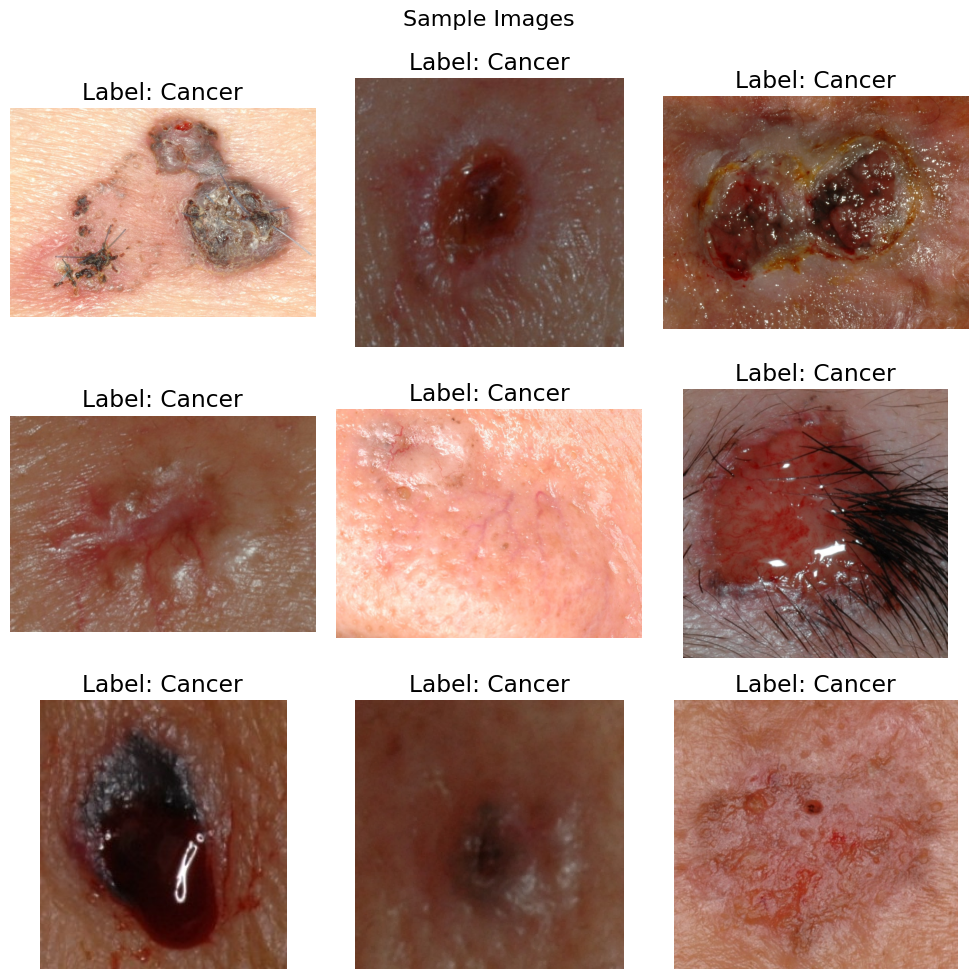

In [ ]:
import matplotlib.pyplot as plt
import cv2  # OpenCV'yi resim okumak için kullanacağız

# Görselleri görselleştirme fonksiyonu
def visualize_images(img_list, label_list, num_samples=9):
    plt.figure(figsize=(10, 10))
    for i in range(num_samples):
        img_path = img_list[i]
        label = label_list[i]

        # Resmi okuma (BGR formatından RGB'ye dönüştürülüyor)
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        # Her bir resmi alt grafik olarak çizme
        plt.subplot(3, 3, i + 1)
        plt.imshow(img)
        plt.title(f"Label: {label}")
        plt.axis('off')

    plt.suptitle("Sample Images", fontsize=16)
    plt.tight_layout()
    plt.show()

# Görselleri görselleştir
visualize_images(img_list, label_list)


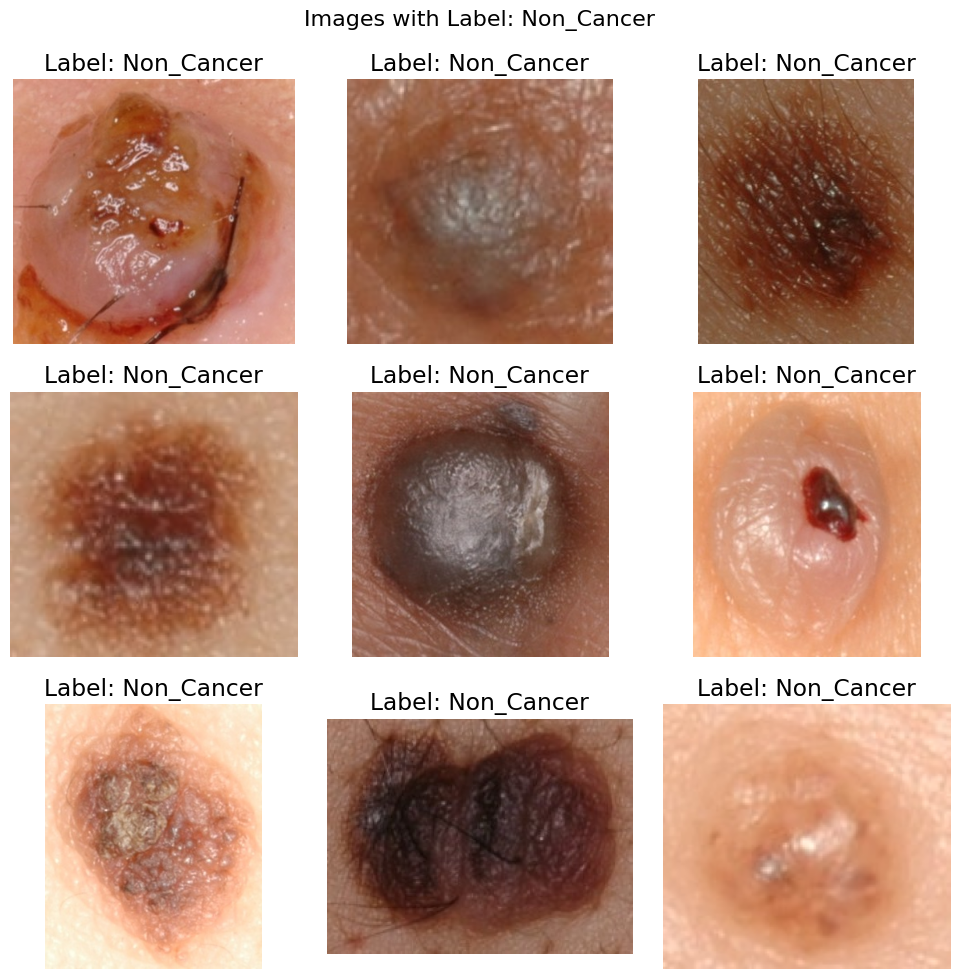

In [ ]:
def visualize_non_cancer_images(img_list, label_list, target_label, num_samples=9):
    plt.figure(figsize=(10, 10))

    # Sadece kanser olmayanları filtrele
    non_cancer_imgs = [img for img, label in zip(img_list, label_list) if label == target_label]

    # Görselleştirme için örnekleri seç
    for i in range(min(num_samples, len(non_cancer_imgs))):
        img_path = non_cancer_imgs[i]

        # Resmi oku ve RGB formatına çevir
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        # Görseli çiz
        plt.subplot(3, 3, i + 1)
        plt.imshow(img)
        plt.title(f"Label: {target_label}")
        plt.axis('off')

    plt.suptitle(f"Images with Label: {target_label}", fontsize=16)
    plt.tight_layout()
    plt.show()

# Kanser olmayan etiketinizi belirtin (örneğin, 'non-cancer')
visualize_non_cancer_images(img_list, label_list, target_label='Non_Cancer')


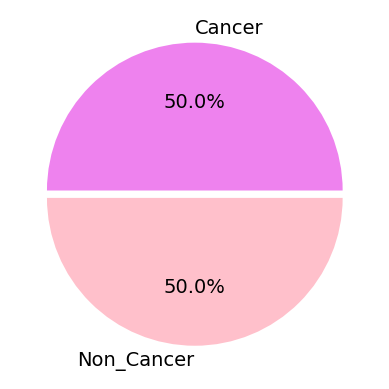

In [ ]:
colors = ['violet', 'pink']
plt.rcParams.update({'font.size': 14})
plt.pie([len([x for x in labels if x=='Cancer']),
         len([x for x in labels if x=='Non_Cancer'])],
        labels=["Cancer","Non_Cancer"],
        colors=colors, autopct='%.1f%%', explode=(0.025,0.025))
plt.show()

In [ ]:
d={"Cancer":1,"Non_Cancer":0}
df['encode_label']=df.labels.map(d)

In [ ]:
df.sample(5)

,img,labels,encode_label
235,Skin_Data/Non_Cancer/1397-1.JPG,Non_Cancer,0
99,Skin_Data/Non_Cancer/1637-02.JPG,Non_Cancer,0
91,Skin_Data/Non_Cancer/1012.JPG,Non_Cancer,0
40,Skin_Data/Cancer/1540-4.JPG,Cancer,1
15,Skin_Data/Cancer/1010-01.JPG,Cancer,1


# Normalizasyon

In [ ]:
import numpy as np
x=[]
for img in df['img']:
    try:
        img = cv2.imread(img)
        img = cv2.resize(img, (170, 170))# 170x170 pixel e çevirme
        img = img / 255.0  # normalize etmee
        x.append(img)      # img

    except:
        print(f"Error loading image: {img}")

In [ ]:
x=np.array(x)

In [ ]:
y=df['encode_label']

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,Dense,Dropout,InputLayer,BatchNormalization,Input,Reshape,MaxPooling2D,Flatten

# CNN Convolutional Netural Networks

In [ ]:
model = Sequential()
model.add(Input(shape=(170,170,3)))

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(2, activation='softmax'))  #son katmada 2 tane var kanser ve ya değil şeklinde

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)                    │ (None, 168, 168, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 84, 84, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 82, 82, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 41, 41, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 107584)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │      13,770,880 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 2)                   │             258 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 13,790,530 (52.61 MB)

 Trainable params: 13,790,530 (52.61 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model2 = Sequential()
model2.add(Input(shape=(170, 170, 3)))

# İlk Convolutional ve Pooling Katmanı
model2.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))

# İkinci Convolutional ve Pooling Katmanı
model2.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))

# Üçüncü Convolutional ve Pooling Katmanı
model2.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))

# Dropout Katmanı
model2.add(Dropout(0.5))

# Flatten ve Dense Katmanları
model2.add(Flatten())
model2.add(Dense(128, activation='relu'))

# Dropout Katmanı
model2.add(Dropout(0.5))

# Çıkış Katmanı
model2.add(Dense(2, activation='softmax'))  # Son katman 2 sınıf: Kanser ve Kanser Değil

model2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model2.summary()


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_19 (Conv2D)                   │ (None, 168, 168, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_19 (MaxPooling2D)      │ (None, 84, 84, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_20 (Conv2D)                   │ (None, 82, 82, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_20 (MaxPooling2D)      │ (None, 41, 41, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_21 (Conv2D)                   │ (None, 39, 39, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_21 (MaxPooling2D)      │ (None, 19, 19, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 19, 19, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_7 (Flatten)                  │ (None, 46208)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 128)                 │       5,914,752 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 2)                   │             258 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,008,258 (22.92 MB)

 Trainable params: 6,008,258 (22.92 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history=model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=32)

Epoch 1/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 15s 2s/step - accuracy: 0.4903 - loss: 3.6437 - val_accuracy: 0.7414 - val_loss: 0.6009
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 20s 2s/step - accuracy: 0.6827 - loss: 0.6349 - val_accuracy: 0.7414 - val_loss: 0.6054
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 20s 2s/step - accuracy: 0.6921 - loss: 0.6180 - val_accuracy: 0.7414 - val_loss: 0.5796
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 21s 2s/step - accuracy: 0.7263 - loss: 0.6190 - val_accuracy: 0.7414 - val_loss: 0.5554
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 21s 2s/step - accuracy: 0.7237 - loss: 0.5484 - val_accuracy: 0.7414 - val_loss: 0.5266
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 20s 2s/step - accuracy: 0.7515 - loss: 0.4935 - val_accuracy: 0.5517 - val_loss: 0.6686
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 13s 2s/step - accuracy: 0.7547 - loss: 0.4679 - val_accuracy: 0.7586 - val_loss: 0.5385
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 20s 2s/step - accuracy: 0.7852 - loss: 0.4040 - val_accuracy: 0.7069 - val_loss: 0.5862
Epoch 9/

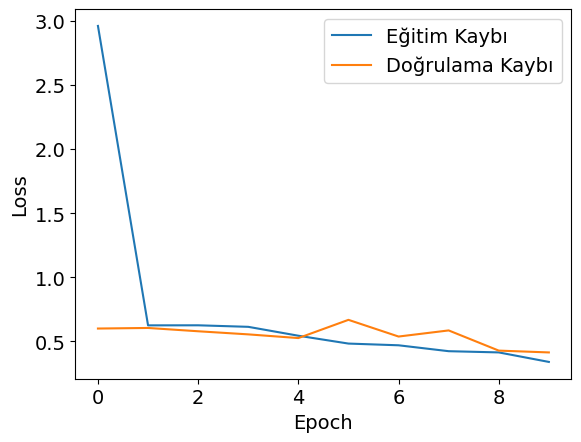

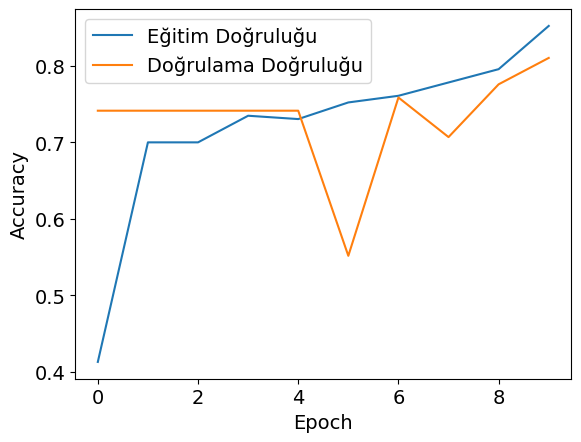

In [ ]:
# Eğitim ve Doğrulama Kaybı
plt.plot(history.history['loss'], label='Eğitim Kaybı')
plt.plot(history.history['val_loss'], label='Doğrulama Kaybı')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Eğitim ve Doğrulama Doğruluğu
plt.plot(history.history['accuracy'], label='Eğitim Doğruluğu')
plt.plot(history.history['val_accuracy'], label='Doğrulama Doğruluğu')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
history2 = model2.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=20, batch_size=40)

Epoch 1/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 18s 3s/step - accuracy: 0.6046 - loss: 0.7920 - val_accuracy: 0.7414 - val_loss: 0.6268
Epoch 2/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 20s 3s/step - accuracy: 0.7027 - loss: 0.6430 - val_accuracy: 0.7414 - val_loss: 0.5688
Epoch 3/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 21s 3s/step - accuracy: 0.7074 - loss: 0.6020 - val_accuracy: 0.7414 - val_loss: 0.5420
Epoch 4/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 16s 3s/step - accuracy: 0.7175 - loss: 0.6010 - val_accuracy: 0.7414 - val_loss: 0.5124
Epoch 5/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 20s 3s/step - accuracy: 0.7084 - loss: 0.6164 - val_accuracy: 0.7586 - val_loss: 0.5161
Epoch 6/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 21s 3s/step - accuracy: 0.7258 - loss: 0.5511 - val_accuracy: 0.6897 - val_loss: 0.6149
Epoch 7/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 20s 3s/step - accuracy: 0.7696 - loss: 0.5153 - val_accuracy: 0.7414 - val_loss: 0.4777
Epoch 8/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 20s 3s/step - accuracy: 0.7785 - loss: 0.4773 - val_accuracy: 0.7759 - val_loss: 0.4617
Epoch 9/

History2 deki değeler daha iyi ve daha gzüel bir sonuç verdi

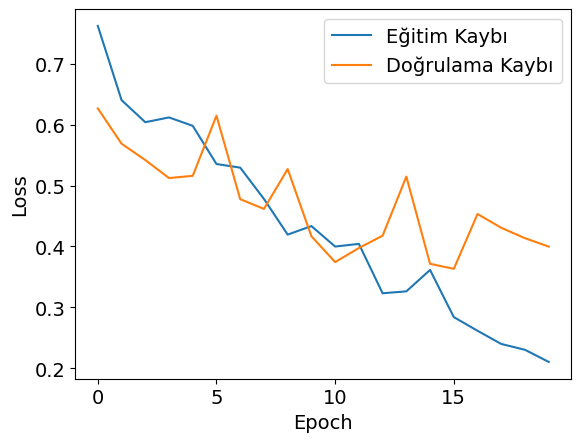

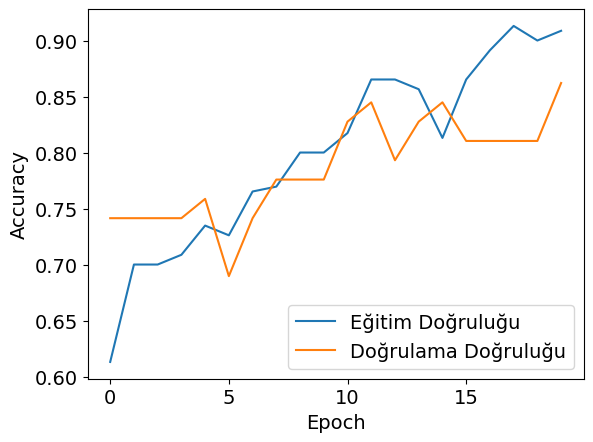

In [ ]:
# Eğitim ve Doğrulama Kaybı
plt.plot(history2.history['loss'], label='Eğitim Kaybı')
plt.plot(history2.history['val_loss'], label='Doğrulama Kaybı')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Eğitim ve Doğrulama Doğruluğu
plt.plot(history2.history['accuracy'], label='Eğitim Doğruluğu')
plt.plot(history2.history['val_accuracy'], label='Doğrulama Doğruluğu')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [ ]:
# Model Saving

import warnings
warnings.filterwarnings('ignore')
model2.save('my_skin_cancer_model2.h5')

In [ ]:
for i in df['img'].head(1):
    try:
        if i==' Skin_Data/Cancer/1007-1.jpg ':
            print(True)
        else:
            print(False)
        input = cv2.imread(i)
        print(input.shape)
        cv2.imshow("gorsel", input)
    except:
        print(f"Error loading image: {i}")
        continue

cv2.waitKey(0)
cv2.destroyAllWindows()

False
(910, 1328, 3)
Error loading image: Skin_Data/Cancer/402-3.JPG


 # Transferlearning and  Transformer

# VGGNET16,ResNet50,Transfer Larning

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, Dense, Flatten, Input, MaxPooling2D, Dropout, BatchNormalization, Reshape
from tensorflow.keras.applications import VGG16, ResNet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator


# ResNet50 ile

In [ ]:
data_dir = 'Skin_Data'
img_width, img_height = 224, 224

train_datagen = ImageDataGenerator(rescale=1/255, validation_split=0.20)

# Training data generator
train_generator = train_datagen.flow_from_directory(
    directory=data_dir,
    target_size=(img_width, img_height),
    class_mode='binary',
    subset='training')

# Validation data generator
validation_generator = train_datagen.flow_from_directory(
    directory=data_dir,
    target_size=(img_width, img_height),
    class_mode='binary',
    subset='validation')


base_model=ResNet50(weights='imagenet',input_shape=(img_height,img_width,3)) # boyut

Found 232 images belonging to 2 classes.
Found 56 images belonging to 2 classes.


In [ ]:
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
data_dir = 'Skin_Data'
img_width, img_height = 224, 224

train_datagen = ImageDataGenerator(rescale=1/255, validation_split=0.20)

# Training data generator
train_generator = train_datagen.flow_from_directory(
    directory=data_dir,
    target_size=(img_width, img_height),
    class_mode='binary',
    subset='training')

# Validation data generator
validation_generator = train_datagen.flow_from_directory(
    directory=data_dir,
    target_size=(img_width, img_height),
    class_mode='binary',
    subset='validation')


base_model = ResNet50(weights='imagenet', input_shape=(img_height, img_width, 3), include_top=False) # include_top=False for transfer learning

model = Sequential()
model.add(base_model)
for layer in base_model.layers:
    layer.trainable = False

model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.6))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history3=model.fit(train_generator, epochs=10, validation_data=validation_generator)


Found 232 images belonging to 2 classes.
Found 56 images belonging to 2 classes.
Epoch 1/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 92s 11s/step - accuracy: 0.5611 - loss: 16.1484 - val_accuracy: 0.2857 - val_loss: 2.3594
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 81s 11s/step - accuracy: 0.5897 - loss: 3.5220 - val_accuracy: 0.7143 - val_loss: 1.3061
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 72s 9s/step - accuracy: 0.5937 - loss: 2.3053 - val_accuracy: 0.7143 - val_loss: 1.1188
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 82s 9s/step - accuracy: 0.6584 - loss: 1.3213 - val_accuracy: 0.7143 - val_loss: 0.5654
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 80s 9s/step - accuracy: 0.6990 - loss: 0.6504 - val_accuracy: 0.7143 - val_loss: 0.5847
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 82s 9s/step - accuracy: 0.6688 - loss: 0.6367 - val_accuracy: 0.7143 - val_loss: 0.5920
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 72s 9s/step - accuracy: 0.7177 - loss: 0.6066 - val_accuracy: 0.7143 - val_loss: 0.6217
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 72s 9s/step 

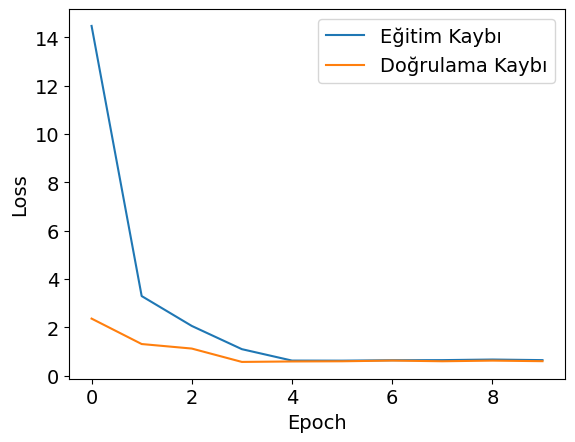

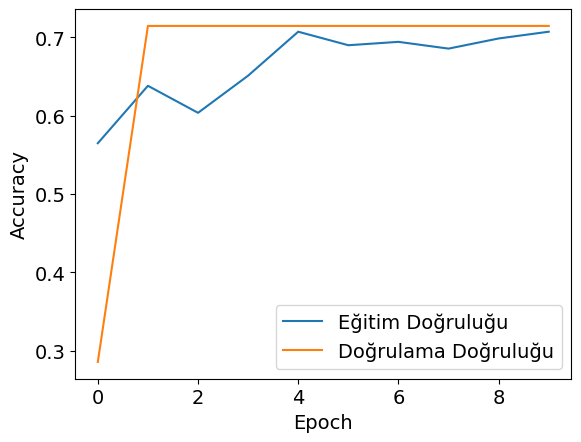

In [ ]:
# Eğitim ve Doğrulama Kaybı
plt.plot(history3.history['loss'], label='Eğitim Kaybı')
plt.plot(history3.history['val_loss'], label='Doğrulama Kaybı')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Eğitim ve Doğrulama Doğruluğu
plt.plot(history3.history['accuracy'], label='Eğitim Doğruluğu')
plt.plot(history3.history['val_accuracy'], label='Doğrulama Doğruluğu')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


# VGG16 ile

In [ ]:
data_dir = 'Skin_Data'
img_width, img_height = 224, 224

train_datagen = ImageDataGenerator(rescale=1/255, validation_split=0.20)

# Training data generator
train_generator = train_datagen.flow_from_directory(
    directory=data_dir,
    target_size=(img_width, img_height),
    class_mode='binary',
    subset='training')

# Validation data generator
validation_generator = train_datagen.flow_from_directory(
    directory=data_dir,
    target_size=(img_width, img_height),
    class_mode='binary',
    subset='validation')


base_model = VGG16(weights='imagenet', input_shape=(img_height, img_width, 3), include_top=False) # include_top=False for transfer learning

model = Sequential()
model.add(base_model)
for layer in base_model.layers:
    layer.trainable = False

model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.6))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history4=model.fit(train_generator, epochs=10, validation_data=validation_generator)


Found 232 images belonging to 2 classes.
Found 56 images belonging to 2 classes.
58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 188s 24s/step - accuracy: 0.6683 - loss: 3.3921 - val_accuracy: 0.7143 - val_loss: 0.9122
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 183s 25s/step - accuracy: 0.6561 - loss: 0.9713 - val_accuracy: 0.7500 - val_loss: 0.5817
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 201s 23s/step - accuracy: 0.7114 - loss: 0.7951 - val_accuracy: 0.8750 - val_loss: 0.3437
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 184s 23s/step - accuracy: 0.7207 - loss: 0.6947 - val_accuracy: 0.7679 - val_loss: 0.5916
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 199s 23s/step - accuracy: 0.8586 - loss: 0.4581 - val_accuracy: 0.8214 - val_loss: 0.3442
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 182s 23s/step - accuracy: 0.8341 - loss: 0.3339 - val_accuracy: 0.8393 - val_loss: 0.3950
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 203s 23s/step - accuracy: 0.8818 - loss: 0.3109 - val_accuracy: 0.8393 - val

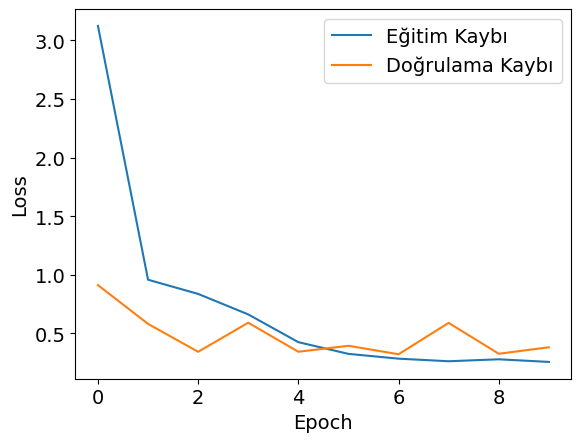

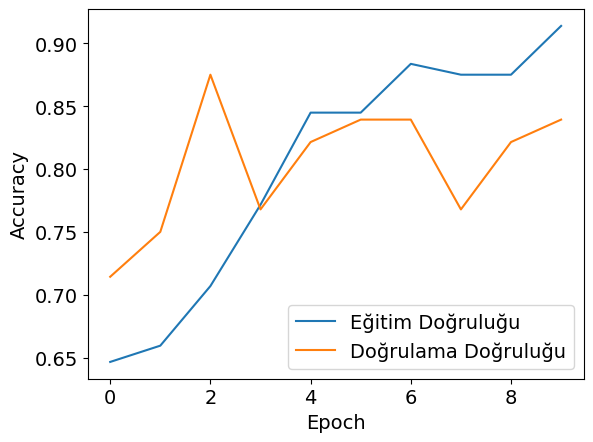

In [ ]:
# Eğitim ve Doğrulama Kaybı
plt.plot(history4.history['loss'], label='Eğitim Kaybı')
plt.plot(history4.history['val_loss'], label='Doğrulama Kaybı')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Eğitim ve Doğrulama Doğruluğu
plt.plot(history4.history['accuracy'], label='Eğitim Doğruluğu')
plt.plot(history4.history['val_accuracy'], label='Doğrulama Doğruluğu')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)                   │ (None, 7, 7, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1024)                │      25,691,136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 1)                   │           1,025 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 91,791,173 (350.16 MB)

 Trainable params: 25,692,161 (98.01 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

 Optimizer params: 51,384,324 (196.02 MB)

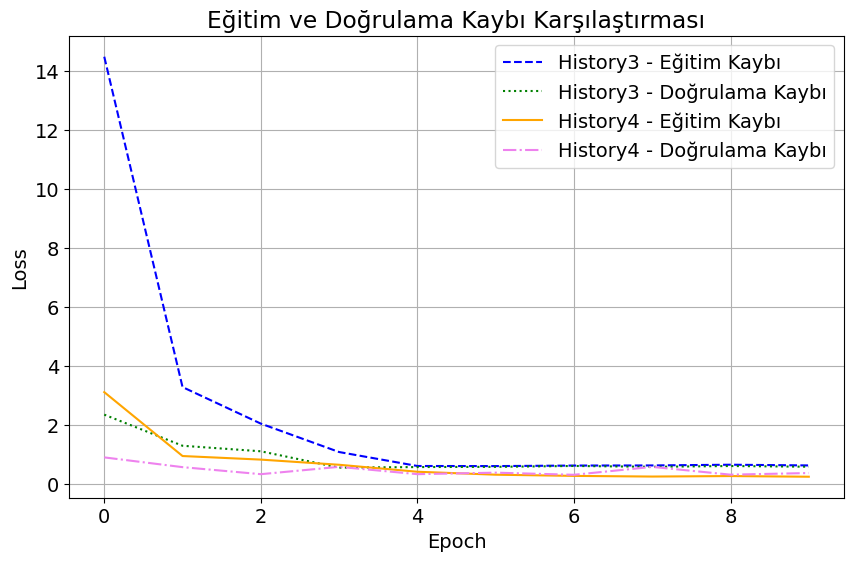

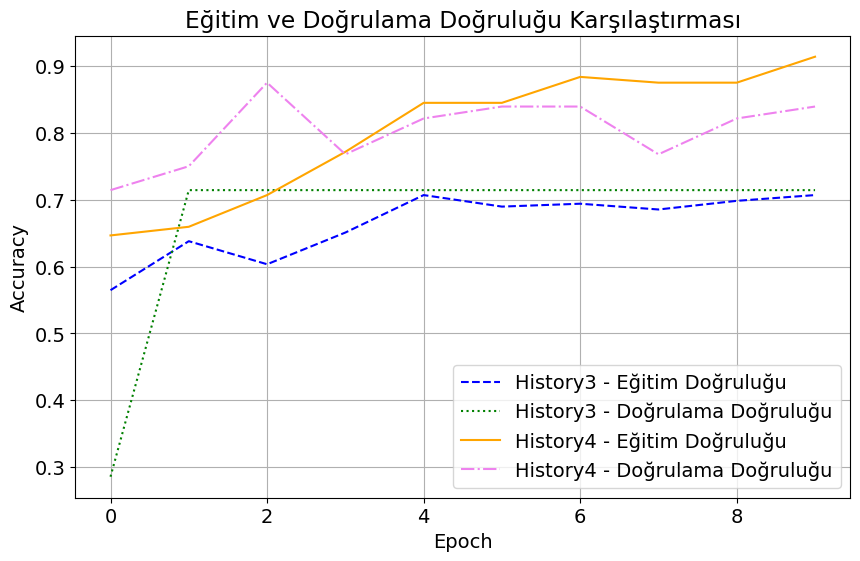

In [ ]:
# Eğitim kaybını karşılaştırma
plt.figure(figsize=(10, 6))
plt.plot(history3.history['loss'], label='History3 - Eğitim Kaybı', linestyle='--', color='blue')
plt.plot(history3.history['val_loss'], label='History3 - Doğrulama Kaybı',linestyle=':', color='green')
plt.plot(history4.history['loss'], label='History4 - Eğitim Kaybı', linestyle='-', color='orange')
plt.plot(history4.history['val_loss'], label='History4 - Doğrulama Kaybı', linestyle='-.',color='violet')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Eğitim ve Doğrulama Kaybı Karşılaştırması')
plt.legend()
plt.grid(True)
plt.show()

# Eğitim doğruluğunu karşılaştırma
plt.figure(figsize=(10, 6))
plt.plot(history3.history['accuracy'], label='History3 - Eğitim Doğruluğu', linestyle='--', color='blue')
plt.plot(history3.history['val_accuracy'], label='History3 - Doğrulama Doğruluğu',linestyle=':', color='green')
plt.plot(history4.history['accuracy'], label='History4 - Eğitim Doğruluğu', linestyle='-', color='orange')
plt.plot(history4.history['val_accuracy'], label='History4 - Doğrulama Doğruluğu', linestyle='-.',color='violet')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Eğitim ve Doğrulama Doğruluğu Karşılaştırması')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
NiN Network